<a href="https://colab.research.google.com/github/Shashidhargk/-customer-segmentation-using-k-means-clustering-pca-code/blob/main/Credit_Card_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/lakshmi2688/lakshmi2688.github.io.git


Cloning into 'lakshmi2688.github.io'...
remote: Enumerating objects: 2208, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 2208 (delta 54), reused 0 (delta 0), pack-reused 2117 (from 1)
Receiving objects: 100% (2208/2208), 22.87 MiB | 27.52 MiB/s, done.
Resolving deltas: 100% (1328/1328), done.


In [ ]:
import os
os.chdir('/content/lakshmi2688.github.io/assets/Clustering')


In [ ]:
!ls


Credit_Card_Customer_Segmentation.ipynb
CreditCardData.csv
Kmeans-BALANCE_FREQUENCY.jpg
Kmeans-BALANCE.jpg
Kmeans-CASH_ADVANCE_FREQUENCY.jpg
Kmeans-CASH_ADVANCE.jpg
Kmeans-CASH_ADVANCE_TRX.jpg
Kmeans-CREDIT_LIMIT.jpg
Kmeans-INSTALLMENTS_PURCHASES.jpg
Kmeans-MINIMUM_PAYMENTS.jpg
Kmeans-ONEOFF_PURCHASES_FREQUENCY.jpg
Kmeans-ONEOFF_PURCHASES.jpg
Kmeans-PAYMENTS.jpg
Kmeans-PRC_FULL_PAYMENT.jpg
Kmeans-PURCHASES_FREQUENCY.jpg
Kmeans-PURCHASES_INSTALLMENTS_FREQUENCY.jpg
Kmeans-PURCHASES.jpg
Kmeans-PURCHASES_TRX.jpg
Kmeans-TENURE.jpg
PCA.jpg


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

%matplotlib inline
# setting the style of the notebook to be monokai theme
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them.


In [ ]:
!git clone https://github.com/lakshmi2688/lakshmi2688.github.io.git
import pandas as pd

# Use the dataset from the cloned repo
creditcard_df = pd.read_csv(
    '/content/lakshmi2688.github.io/assets/Clustering/CreditCardData.csv'
)

creditcard_df.head()


Cloning into 'lakshmi2688.github.io'...
remote: Enumerating objects: 2208, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 2208 (delta 54), reused 0 (delta 0), pack-reused 2117 (from 1)
Receiving objects: 100% (2208/2208), 22.87 MiB | 27.46 MiB/s, done.
Resolving deltas: 100% (1328/1328), done.


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
# Let's apply info and get additional insights on our dataframe
creditcard_df.info()
# 18 features with 8950 points

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
print("Average, min, max", creditcard_df['BALANCE'].mean(), creditcard_df['BALANCE'].min(), creditcard_df['BALANCE'].max())

Average, min, max 1564.4748276781006 0.0 19043.13856


In [ ]:
creditcard_df.describe()# Let's apply describe() and get more statistical insights on our dataframe
# Mean balance is $1564
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
creditcard_df.query('ONEOFF_PURCHASES == ONEOFF_PURCHASES.max()')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [ ]:
creditcard_df.query('CASH_ADVANCE == CASH_ADVANCE.max()')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


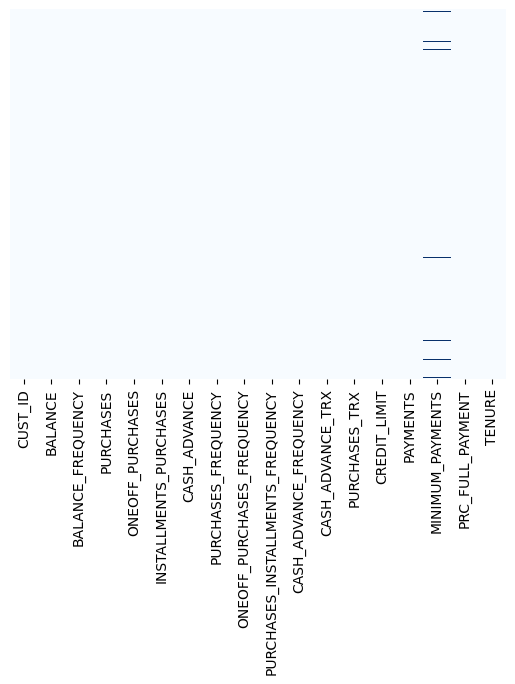

In [ ]:
# Let's see if we have any missing data
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues");


In [ ]:
creditcard_df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [ ]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT'
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()
creditcard_df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [ ]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()
creditcard_df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [ ]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

np.int64(0)

In [ ]:
# Drop the 'CUST_ID' column
creditcard_df = creditcard_df.drop('CUST_ID', axis=1)

# Verify it's removed
print(creditcard_df.columns)


Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')


In [ ]:
creditcard_df.columns


Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [ ]:
creditcard_df.drop('CUST_ID', axis=1, inplace=True, errors='ignore')


In [ ]:
print(creditcard_df.columns)


Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')


In [ ]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
n = len(creditcard_df.columns)
n

17

In [ ]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/tmp/ipython-input-27-421519636.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"bw":0.2,"color": "b", "lw": 2, "label": "KDE"}, hist_kws={"color": "g"})
/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:2496: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/tmp/ipython-input-27-421519636.py:4: UserWarning: 

`distplot` is a deprecated f

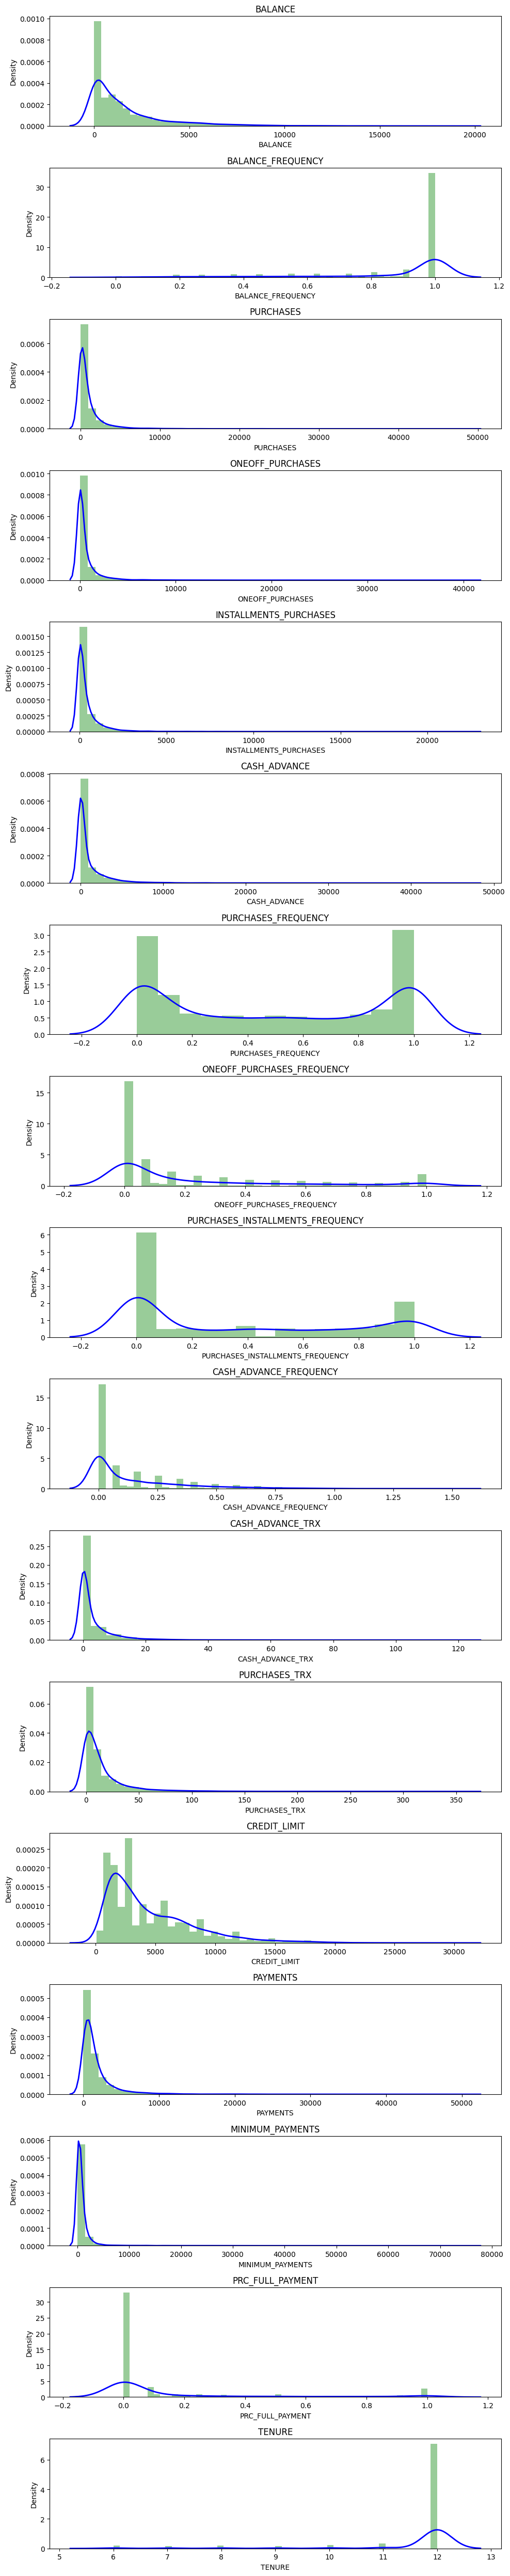

In [ ]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(17, 1, i+1)
    sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"bw":0.2,"color": "b", "lw": 2, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(creditcard_df.columns[i])

plt.tight_layout()

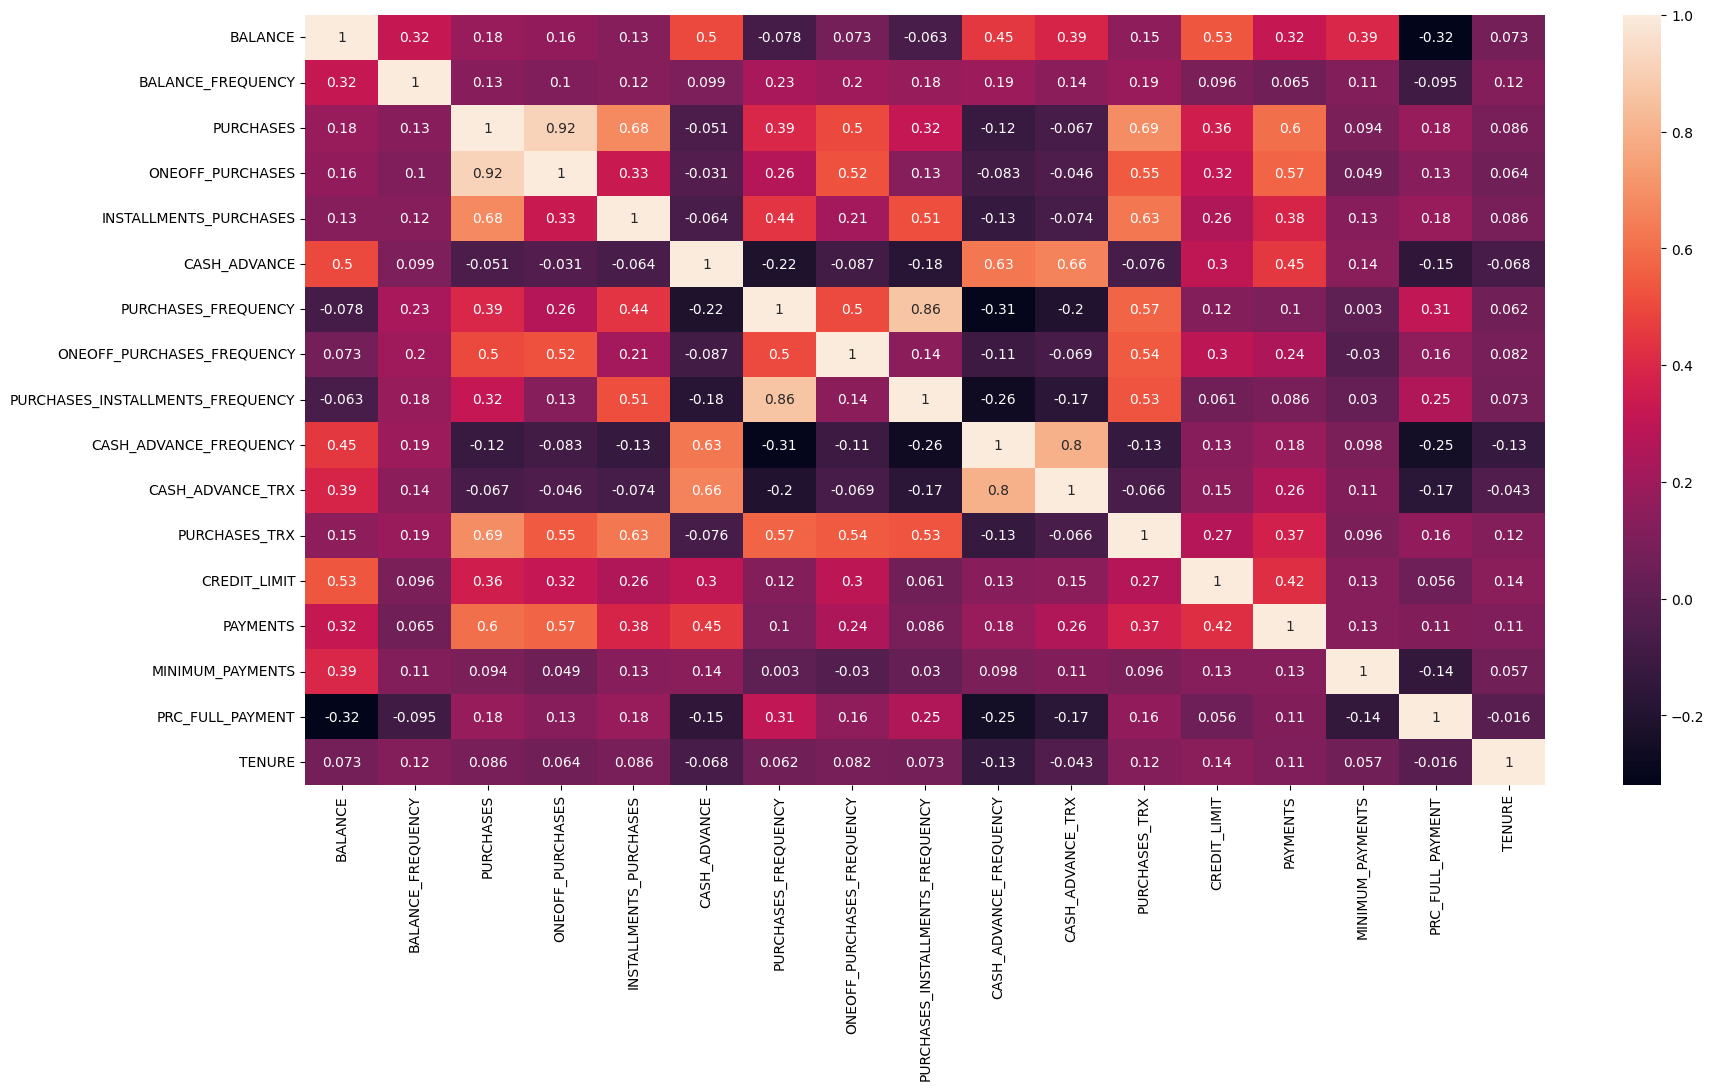

In [ ]:
correlations = creditcard_df.corr()
f, ax = plt.subplots(figsize=(20,10))
sns.heatmap(correlations,annot=True);

In [ ]:
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [ ]:
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

Text(0, 0.5, 'Within cluster sum of square')

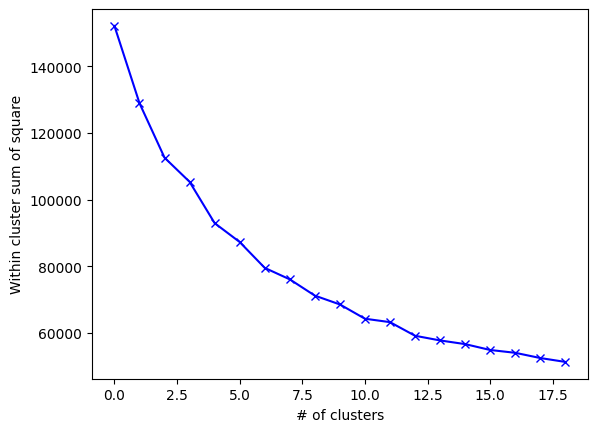

In [ ]:
# Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
#       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
#       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
#       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
#       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
#       'TENURE'], dtype='object')

scores_1 = []
range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(creditcard_df_scaled)
    scores_1.append(kmeans.inertia_)

plt.plot(scores_1,'bx-')
plt.xlabel('# of clusters')
plt.ylabel('Within cluster sum of square')


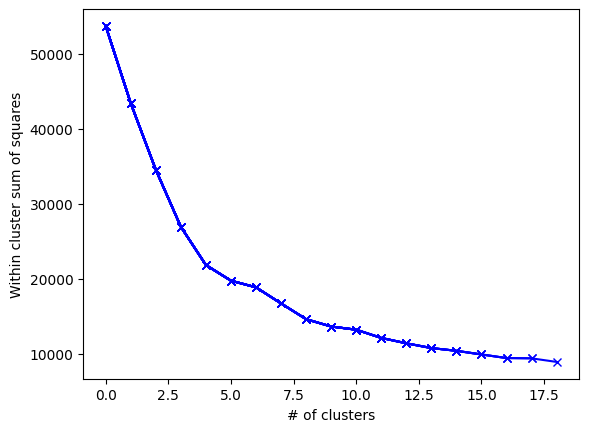

In [ ]:
scores_1 = []
range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(creditcard_df_scaled[:,:6])
    scores_1.append(kmeans.inertia_)

    plt.plot(scores_1,'bx-')
    plt.xlabel('# of clusters')
    plt.ylabel('Within cluster sum of squares')


#  APPLY K-MEANS METHOD

Choose # of clusters as 4

In [ ]:
kmeans = KMeans(4)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_ # labels associated with each data point
# index of the cluster centroid that is closest to x(i)

In [ ]:
kmeans.cluster_centers_.shape # centroid for clusters = mu_c(i)

(4, 17)

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.468675,0.385062,-0.233431,-0.163074,-0.252435,1.698607,-0.502106,-0.211235,-0.447953,1.751541,1.625349,-0.281784,0.848600,0.609527,0.494885,-0.405904,-0.095478
1,-0.262778,-0.366568,-0.342986,-0.230363,-0.387569,-0.180340,-0.797793,-0.389275,-0.714293,-0.097471,-0.161765,-0.474793,-0.333632,-0.261106,-0.118567,-0.259521,-0.054059
2,-0.322047,0.242517,0.108898,0.000774,0.255839,-0.365936,0.984294,0.317200,0.874815,-0.462865,-0.360269,0.297034,-0.077362,-0.138519,-0.091871,0.395323,0.058320
3,0.954485,0.462694,3.125845,2.713251,2.406470,-0.155091,1.136338,1.798653,1.065918,-0.319096,-0.170458,3.003251,1.429882,1.919096,0.477421,0.454703,0.324140


In [ ]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,650.167072,0.269258,11.594595
1,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100
2,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312
3,1011.751528,0.789871,269.973466,209.853863,60.386625,595.759339,0.170146,0.086281,0.080578,0.114833,2.125503,2.903421,3277.703165,974.505090,586.301239,0.078001,11.446429


In [ ]:
labels.shape # Labels associated to each data point

(8950,)

In [ ]:
labels.max()

3

In [ ]:
labels.min()

np.int32(0)

In [ ]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([2, 3, 0, ..., 0, 2, 2], dtype=int32)

In [ ]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'CLUSTER':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [ ]:
import matplotlib.pyplot as plt
import os

# Create a folder in Colab to save plots
os.makedirs('/content/plots', exist_ok=True)

# Plot histograms for each cluster
for i in creditcard_df.columns:
    plt.figure(figsize=(35, 5))
    for j in range(4):
        plt.subplot(1, 4, j + 1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['CLUSTER'] == j]
        ax = cluster[i].hist(bins=20)
        plt.title(f'{i}\nCluster {j}')

    # Save plot to Colab folder
    plt.savefig(f'/content/plots/Kmeans-{i}.jpg')
    plt.close()  # Close to avoid overlapping plots

print("✅ Histograms saved in /content/plots")


✅ Histograms saved in /content/plots


In [ ]:
!ls /content/plots


Kmeans-BALANCE_FREQUENCY.jpg
Kmeans-BALANCE.jpg
Kmeans-CASH_ADVANCE_FREQUENCY.jpg
Kmeans-CASH_ADVANCE.jpg
Kmeans-CASH_ADVANCE_TRX.jpg
Kmeans-CREDIT_LIMIT.jpg
Kmeans-INSTALLMENTS_PURCHASES.jpg
Kmeans-MINIMUM_PAYMENTS.jpg
Kmeans-ONEOFF_PURCHASES_FREQUENCY.jpg
Kmeans-ONEOFF_PURCHASES.jpg
Kmeans-PAYMENTS.jpg
Kmeans-PRC_FULL_PAYMENT.jpg
Kmeans-PURCHASES_FREQUENCY.jpg
Kmeans-PURCHASES_INSTALLMENTS_FREQUENCY.jpg
Kmeans-PURCHASES.jpg
Kmeans-PURCHASES_TRX.jpg
Kmeans-TENURE.jpg


In [ ]:
from google.colab import files
files.download('/content/plots/Kmeans-BALANCE.jpg')  # example


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#  APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

In [ ]:
# Assuming you already have 'creditcard_df' cleaned
# (no CUST_ID and ready for PCA)

X = creditcard_df.values  # Convert DataFrame to NumPy array

# Now compute covariance and eigen decomposition
C = np.cov(X, bias=True)
eigenValues, eigenVectors = np.linalg.eig(C)

# Sort eigenvalues in descending order
idx = eigenValues.argsort()[::-1]
sorted_eigenvalues = eigenValues[idx]

# Calculate number of PCs needed for 99% variance
total_variance = np.sum(sorted_eigenvalues)
cumulative_variance = np.cumsum(sorted_eigenvalues)
p = np.searchsorted(cumulative_variance / total_variance, 0.99) + 1

print("Required # of PCs:", p)


Required # of PCs: 7


<h3> Original scores </h3>

X shape: (17, 8950)


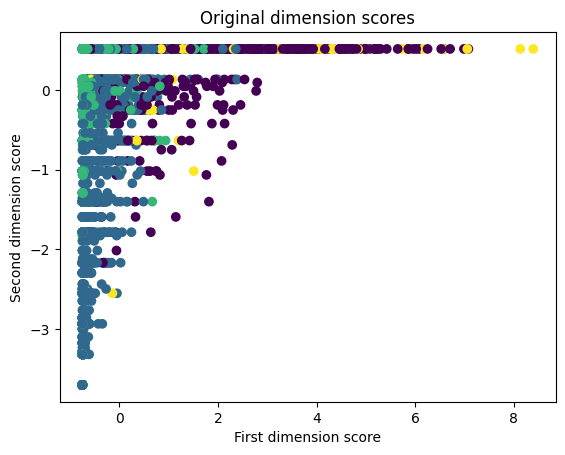

In [ ]:
X = creditcard_df_scaled.T
print("X shape:", X.shape)
plt.scatter(X[0, :], X[1, :], c=labels)
plt.xlabel('First dimension score')
plt.ylabel('Second dimension score')
plt.title("Original dimension scores")
plt.show()

<h3> Principal Component analysis using Power Iteration </h3>

In [ ]:
def powerIter(C,V):

    max_iter=1000
    iter_num =0
    results_dict = {}
    lamda_hist = []

    while iter_num < max_iter :
        z = C.dot(V)
        V=z/np.linalg.norm(z)
        eigval_lamda = (V.T).dot(C).dot(V) # (1 * d).(d * d).(d * 1) = 1 * 1
        eigval_lamda = eigval_lamda.item() # gets the value from 2d array
        results_dict[eigval_lamda] = V
        lamda_hist.append(eigval_lamda)
        iter_num += 1


    return iter_num, lamda_hist,results_dict


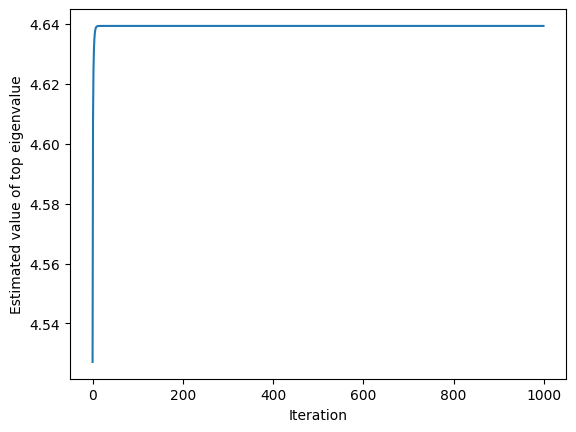

Estimated first eigenvalue: 4.639306326976706
First PC *********
[ 0.1010775   0.12004342  0.41164155  0.34640703  0.33681432 -0.02334324
  0.32149284  0.2946332   0.27470974 -0.08913903 -0.04865394  0.39069524
  0.21166292  0.26624897  0.06035128  0.13211231  0.0810205 ]


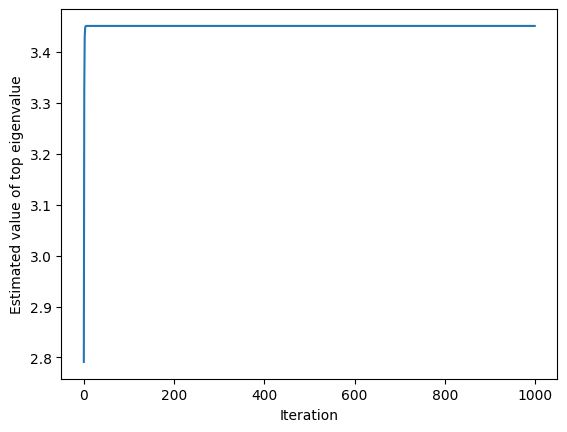

Estimated second eigenvalue: 3.451338526628729
Second PC *********
[ 0.40395722  0.13053705  0.04103786  0.06287187 -0.0185328   0.43924153
 -0.19078025 -0.01792382 -0.17860091  0.43408232  0.41973386 -0.01939408
  0.23867794  0.25747607  0.16696952 -0.19002551 -0.00432648]


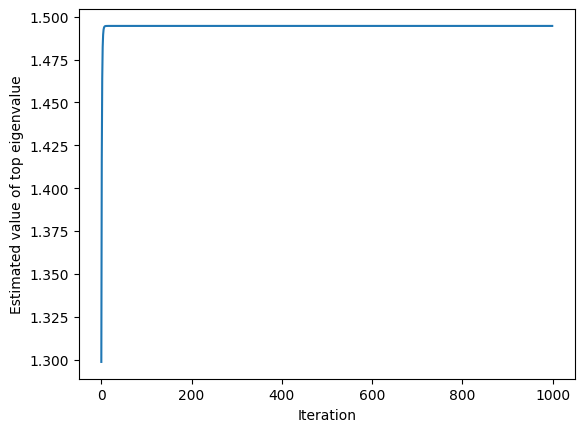

Estimated third eigenvalue: 1.4946365060259614
Third PC *********
[ 0.16007504  0.42062987 -0.25790273 -0.39211489  0.11048839  0.0273454
  0.37469147 -0.11513072  0.47340919  0.10907217  0.1155405   0.07733064
 -0.10048344 -0.27623652  0.22163462 -0.12477356  0.06432602]


In [ ]:
d,n = X.shape
C = np.cov(X,bias=True) # d * d
V = np.random.rand(d,1)
iter_num, lamda_hist,results_dict  = powerIter(C,V)
lamda_hist.sort() # sort the list in ascending order
lamda_first = lamda_hist[-1] #highest lamda or highest eigen value
first_PC_eigvec = results_dict[lamda_first]
plt.plot(lamda_hist)
plt.xlabel('Iteration')
plt.ylabel('Estimated value of top eigenvalue')
plt.show()
print("Estimated first eigenvalue:", lamda_first)
print("First PC *********")
print(first_PC_eigvec.flatten())

C = np.cov(X,bias=True)
C = C -  lamda_first *(first_PC_eigvec.dot(first_PC_eigvec.T))
V = np.random.rand(d,1)
iter_num, lamda_hist,results_dict  = powerIter(C,V)
lamda_hist.sort() # sort the list
lamda_second = lamda_hist[-1] #highest lamda - sorting in asc order (highest eigen value)
second_PC_eigvec = results_dict[lamda_second]
plt.plot(lamda_hist)
plt.xlabel('Iteration')
plt.ylabel('Estimated value of top eigenvalue')
plt.show()
print("Estimated second eigenvalue:", lamda_second)
print("Second PC *********")
print(second_PC_eigvec.flatten())

C = np.cov(X,bias=True)
C = C - lamda_first *(first_PC_eigvec.dot(first_PC_eigvec.T)) - lamda_second *(second_PC_eigvec.dot(second_PC_eigvec.T))
V = np.random.rand(d,1)
iter_num, lamda_hist,results_dict  = powerIter(C,V)
lamda_hist.sort() # sort the list
lamda_third = lamda_hist[-1] #highest lamda - sorting in asc order (highest eigen value)
third_PC_eigvec = results_dict[lamda_third]
plt.plot(lamda_hist)
plt.xlabel('Iteration')
plt.ylabel('Estimated value of top eigenvalue')
plt.show()
print("Estimated third eigenvalue:", lamda_third)
print("Third PC *********")
print(third_PC_eigvec.flatten())

V shape:  (3, 17)
Z.shape:  (17, 8950)

       pca1      pca2      pca3
0 -1.682220 -1.076451 -0.488507
1 -1.138295  2.506477 -0.601212
2  0.969684 -0.383520 -0.102371
3 -0.873628  0.043166 -1.460167
4 -1.599434 -0.688581 -0.365094

scores shape: (3, 8950)


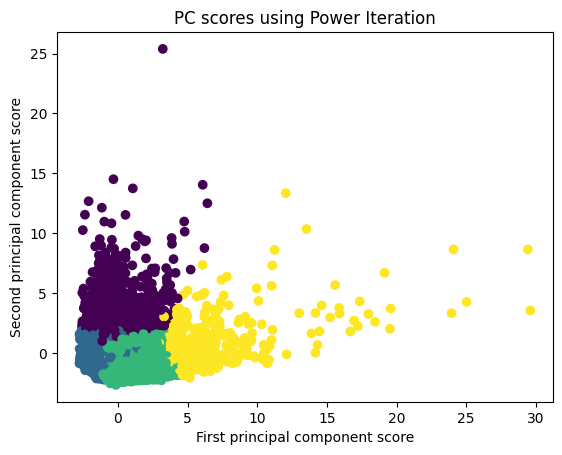

In [ ]:
V = np.vstack((first_PC_eigvec.flatten(), second_PC_eigvec.flatten(),third_PC_eigvec.flatten()))
print("V shape: ",V.shape)
Z = X # X is already scaled
print("Z.shape: ",Z.shape)
scores = V.dot(Z)
print()
pca_scores = pd.DataFrame(data = scores.T, columns =['pca1','pca2','pca3'])
print(pca_scores.head())
print()
print("scores shape:", scores.shape)
plt.scatter(scores[0, :], scores[1, :], c=labels)
plt.xlabel('First principal component score')
plt.ylabel('Second principal component score')
plt.title("PC scores using Power Iteration")
plt.show()


<h3> Principal Component analysis using Skicit learn </h3>

In [ ]:
# Obtain the principal components
pca=PCA(n_components=3)
pca.fit(creditcard_df_scaled)

PCA(n_components=3)

In [ ]:
print('****First Eigen value***')
print(pca.explained_variance_[0])
print('*******First principal component*****')
print(pca.components_[0])
print()
print('****Second Eigen value***')
print(pca.explained_variance_[1])
print('*******Second principal component:*****')
print(pca.components_[1])
print()
print('****Third Eigen value***')
print(pca.explained_variance_[2])
print('*******Third principal component:*****')
print(pca.components_[2])

****First Eigen value***
4.639824743149119
*******First principal component*****
[ 0.1010775   0.12004342  0.41164155  0.34640703  0.33681432 -0.02334324
  0.32149284  0.2946332   0.27470974 -0.08913903 -0.04865394  0.39069524
  0.21166292  0.26624897  0.06035128  0.13211231  0.0810205 ]

****Second Eigen value***
3.451724194136451
*******Second principal component:*****
[ 0.40395722  0.13053705  0.04103786  0.06287187 -0.0185328   0.43924153
 -0.19078025 -0.01792382 -0.17860091  0.43408232  0.41973386 -0.01939408
  0.23867794  0.25747607  0.16696952 -0.19002551 -0.00432648]

****Third Eigen value***
1.4948035231793881
*******Third principal component:*****
[ 0.16007504  0.42062987 -0.25790273 -0.39211489  0.11048839  0.0273454
  0.37469147 -0.11513072  0.47340919  0.10907217  0.1155405   0.07733064
 -0.10048344 -0.27623652  0.22163462 -0.12477356  0.06432602]


scores shape: (3, 8950)


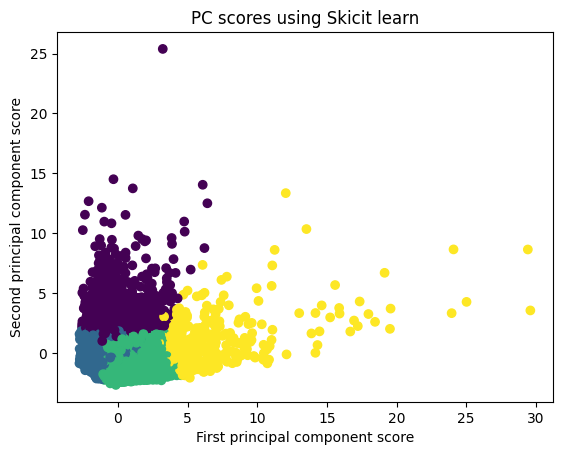

,pca1,pca2,pca3
0,-1.682220,-1.076451,-0.488507
1,-1.138295,2.506477,-0.601212
2,0.969684,-0.383520,-0.102371
3,-0.873628,0.043166,-1.460167
4,-1.599434,-0.688581,-0.365094


In [ ]:
# Create a dataframe with the 4 components
sklearn_scores  = pca.transform(creditcard_df_scaled)


print("scores shape:", scores.shape)
plt.scatter(sklearn_scores [:, 0], sklearn_scores [:, 1], c=labels)
plt.xlabel('First principal component score')
plt.ylabel('Second principal component score')
plt.title("PC scores using Skicit learn")
plt.show()


pca_sklearn_scores = pd.DataFrame(data = sklearn_scores, columns =['pca1','pca2','pca3'])
pca_sklearn_scores.head()

<h3>Combine pca scores with cluster information</h3>

In [ ]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_sklearn_scores,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df

,pca1,pca2,pca3,cluster
0,-1.682220,-1.076451,-0.488507,1
1,-1.138295,2.506477,-0.601212,0
2,0.969684,-0.383520,-0.102371,2
3,-0.873628,0.043166,-1.460167,1
4,-1.599434,-0.688581,-0.365094,1
...,...,...,...,...
8945,-0.359629,-2.016145,0.995355,2
8946,-0.564369,-1.639123,1.290238,2
8947,-0.926204,-1.810786,0.474723,2
8948,-2.336552,-0.657966,-0.974725,1


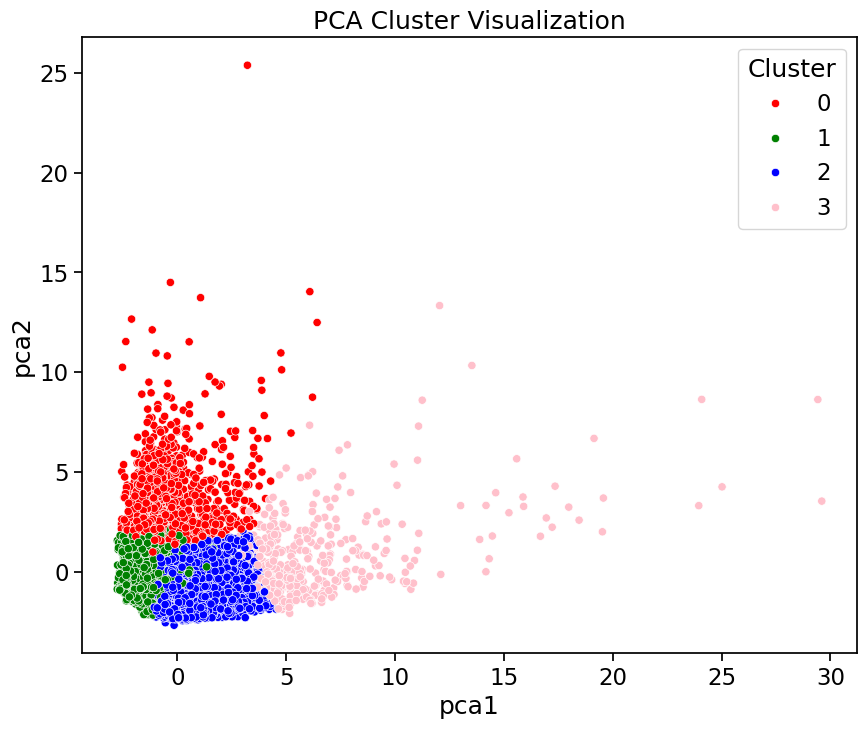

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

ax = sns.scatterplot(
    x="pca1",
    y="pca2",
    hue="cluster",
    data=pca_df,
    palette=['red', 'green', 'blue', 'pink']
)

plt.title("PCA Cluster Visualization")
plt.legend(title='Cluster')

# ✅ Save in Colab (optional)
plt.savefig('/content/PCA.jpg')

# ✅ Display directly in notebook
plt.show()


In [ ]:
# Reconstruct

print('Projected data from PCA method:', scores[0,:10])
print()
print('Projected data from scikit-learn:', sklearn_scores[:10,0])
print()
X_reconstruct = V.T.dot(scores)
print('Reconstructed X:', X_reconstruct[0,:10])
print()
X_orig = X
print('Original X:', X_orig[0,:10])
print()

#Avg square projection error/total variation in data
np.sum((np.linalg.norm(X_orig - X_reconstruct))**2)/np.sum((np.linalg.norm(X_orig))**2)

Projected data from PCA method: [-1.68222026 -1.1382949   0.96968401 -0.87362773 -1.59943384  0.25129386
  6.35292031  0.27710287 -0.44174395 -0.5625095 ]

Projected data from scikit-learn: [-1.68222026 -1.1382949   0.96968401 -0.87362773 -1.59943384  0.25129386
  6.35292031  0.27710287 -0.44174395 -0.5625095 ]

Reconstructed X: [-0.6830723   0.80121425 -0.07329966 -0.30460326 -0.49826622 -0.10843059
  0.02916636 -0.20063658 -0.26181453 -0.51764917]

Original X: [-0.73198937  0.78696085  0.44713513  0.04909914 -0.3587753   0.11787839
 -0.45027722  0.12452002 -0.26402625 -0.67850402]



np.float64(0.4361599200216801)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive
